In [0]:
# import nltk
# nltk.download('wordnet')

# from google.colab import files
# uploaded = files.upload()

In [0]:

import pandas as pd
import gensim
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score
import seaborn as sns

In [0]:
df = pd.read_excel("TwitterTimeline_tweetsNewAndOLd.xlsx", sheet_name=None, ignore_index=True, sort=True)
data = pd.concat(df.values(), ignore_index=True, sort=False)

In [5]:
data.isna().sum()

Unnamed: 0    0
Tweet_text    0
Tag           0
dtype: int64

In [6]:
data['Tag'].value_counts()

PT    5408
WB    2624
ST    2546
ED    1663
SP    1578
RE    1534
SI    1443
EN    1128
HT     855
BN     736
GM     605
NW     192
Name: Tag, dtype: int64

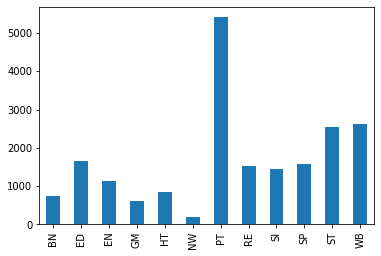

In [7]:
data['Tag'].value_counts().sort_index().plot.bar()

In [8]:
data['Tag'].describe()

count     20312
unique       12
top          PT
freq       5408
Name: Tag, dtype: object

In [9]:
data.head()

Unnamed: 0                                         Tweet_text Tag
0           0  RT @AndrewYNg: Right now economists are debati...  BN
1           1  An investment in knowledge pays the best inter...  WB
2           2  RT @IMustajabgohar: Sino Tires to Invest $600 ...  BN
3           3  RT @IKLover1992: 22 Years struggle has finally...  PT
4           4  RT @insaafian92107: Trade deficit dips 14pc to...  BN

In [10]:
data.shape

(20312, 3)

In [0]:
my_tags = ['ST', 'PT', 'HT', 'BN', 'ED', 'SP', 'EN', 'SI', 'RE', 'GM','WB', 'NW']

In [0]:
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text_to_preprocess):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text_to_preprocess, pos='v'))

def preprocess(text_to_preprocess):
    result = []
    for token in gensim.utils.simple_preprocess(text_to_preprocess):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return " ".join(result)

In [0]:
data['Tweet_text'] = data['Tweet_text'].map(preprocess)


In [0]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(data['Tweet_text'], data['Tag'], stratify=data['Tag'],random_state = 0)

In [15]:
print("train_x shape",train_x.shape)
print("train_y shape",train_y.shape)
print("test_x shape",test_x.shape)
print("test_y shape",test_y.shape)

train_x shape (15234,)
train_y shape (15234,)
test_x shape (5078,)
test_y shape (5078,)


In [16]:
col=['Tag']
train_y = pd.DataFrame(train_y)
train_y['Tag'].value_counts()

PT    4056
WB    1968
ST    1910
ED    1247
SP    1184
RE    1150
SI    1082
EN     846
HT     641
BN     552
GM     454
NW     144
Name: Tag, dtype: int64

In [17]:
col=['Tag']
test_y = pd.DataFrame(test_y)
test_y['Tag'].value_counts()

PT    1352
WB     656
ST     636
ED     416
SP     394
RE     384
SI     361
EN     282
HT     214
BN     184
GM     151
NW      48
Name: Tag, dtype: int64

In [18]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y.values)
test_y = encoder.fit_transform(test_y.values)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(data['Tweet_text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
                vocabulary=None)

In [0]:
# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xtest_count =  count_vect.transform(test_x)

In [0]:
def train_model(clf, x_train, y_train, x_test, y_test, verbose=False):
    clf = clf.fit(x_train, y_train)    
    pred = clf.predict(x_test)    
    
    if verbose:
        tweet = "Sanju Movie was fantastic"
        print("Predicting tweet: {}".format(tweet))
        custom_pred = clf.predict(count_vect.transform([tweet]))
        print("Result: {}".format(encoder.inverse_transform(custom_pred)))
    
    return metrics.accuracy_score(pred, y_test)

In [0]:
def formatAccuracy(acc):
    return round(acc*100, 3)

~ Using Naive Bayes ~ 
Predicting tweet: Sanju Movie was fantastic
Result: ['SP']
Accuracy: 69.968%
roc_auc_score : 0.8014258385191502
              precision    recall  f1-score   support

          ST       0.54      0.61      0.57       184
          PT       0.56      0.55      0.56       416
          HT       0.70      0.64      0.67       282
          BN       0.44      0.57      0.50       151
          ED       0.79      0.84      0.81       214
          SP       0.08      0.12      0.10        48
          EN       0.85      0.80      0.82      1352
          SI       0.77      0.86      0.81       384
          RE       0.41      0.33      0.37       361
          GM       0.90      0.86      0.88       394
          WB       0.77      0.78      0.77       636
          NW       0.57      0.59      0.58       656

    accuracy                           0.70      5078
   macro avg       0.61      0.63      0.62      5078
weighted avg       0.70      0.70      0.70      5078

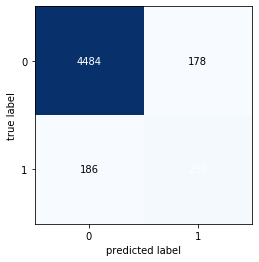

In [23]:
print ("~ Using Naive Bayes ~ ")
NBModel = naive_bayes.MultinomialNB(alpha=0.1)
accuracyNB = train_model(NBModel, xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyNB)))
NBModel = NBModel.fit(xtrain_count, train_y) 
pred = NBModel.predict(xtest_count)
import sklearn
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
print(classification_report(test_y, pred,target_names=my_tags))

import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()



In [24]:
#SVC
print()
print ("~ Using Linear SVC ~ ")
SVCModel = svm.LinearSVC(C=0.1)
accuracySVC = train_model(SVCModel, xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracySVC)))
SVCModel = SVCModel.fit(xtrain_count, train_y) 
pred = SVCModel.predict(xtest_count)
import sklearn
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
print(classification_report(test_y, pred,target_names=my_tags))


~ Using Linear SVC ~ 
Predicting tweet: Sanju Movie was fantastic
Result: ['WB']
Accuracy: 72.548%
roc_auc_score : 0.7990714912513739
              precision    recall  f1-score   support

          ST       0.69      0.58      0.63       184
          PT       0.60      0.57      0.59       416
          HT       0.74      0.69      0.72       282
          BN       0.56      0.51      0.53       151
          ED       0.87      0.84      0.85       214
          SP       0.00      0.00      0.00        48
          EN       0.81      0.89      0.85      1352
          SI       0.80      0.83      0.81       384
          RE       0.56      0.30      0.39       361
          GM       0.92      0.86      0.89       394
          WB       0.73      0.80      0.77       636
          NW       0.54      0.62      0.57       656

    accuracy                           0.73      5078
   macro avg       0.65      0.62      0.63      5078
weighted avg       0.72      0.73      0.72      5078

SVC


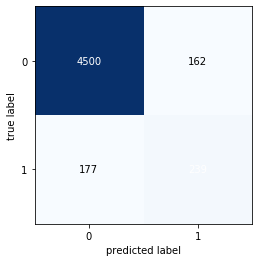

In [25]:
print('SVC')

cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)


fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()



In [26]:
#LR
print()
print ("~ Using Logistic Regression ~ ")
LRModel = linear_model.LogisticRegression(C=1.0, solver='lbfgs', multi_class='multinomial')
accuracySVC = train_model(LRModel, xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracySVC)))
LRModel = LRModel.fit(xtrain_count, train_y) 
pred = LRModel.predict(xtest_count)
import sklearn
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
print(classification_report(test_y, pred,target_names=my_tags))


~ Using Logistic Regression ~ 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Predicting tweet: Sanju Movie was fantastic
Result: ['WB']
Accuracy: 71.938%
roc_auc_score : 0.7949345485730454
              precision    recall  f1-score   support

          ST       0.71      0.55      0.62       184
          PT       0.59      0.56      0.57       416
          HT       0.71      0.68      0.70       282
          BN       0.60      0.49      0.54       151
          ED       0.90      0.83      0.86       214
          SP       0.00      0.00      0.00        48
          EN       0.81      0.88      0.85      1352
          SI       0.82      0.81      0.82       384
          RE       0.50      0.34      0.40       361
          GM       0.93      0.85      0.89       394
          WB       0.72      0.79      0.75       636
          NW       0.53      0.64      0.58       656

    accuracy                           0.72      5078
   macro avg       0.65      0.62      0.63      5078
weighted avg       0.71      0.72      0.71      5078



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


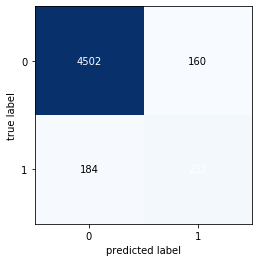

In [27]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()



In [28]:
#RF
print()
print ("~ Using Random Forest Classifier ~")
RFModel = RandomForestClassifier(n_estimators=500, max_depth=200, random_state=0)
accuracyRF = train_model(RFModel,xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyRF)))
RFModel = RFModel.fit(xtrain_count, train_y) 
pred = RFModel.predict(xtest_count)
import sklearn
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
print(classification_report(test_y, pred,target_names=my_tags))


~ Using Random Forest Classifier ~
Predicting tweet: Sanju Movie was fantastic
Result: ['WB']
Accuracy: 71.012%
roc_auc_score : 0.7828036503387885
              precision    recall  f1-score   support

          ST       0.73      0.51      0.60       184
          PT       0.63      0.57      0.60       416
          HT       0.81      0.62      0.70       282
          BN       0.66      0.39      0.49       151
          ED       0.91      0.84      0.87       214
          SP       0.00      0.00      0.00        48
          EN       0.81      0.89      0.85      1352
          SI       0.81      0.84      0.82       384
          RE       0.64      0.21      0.31       361
          GM       0.89      0.81      0.85       394
          WB       0.65      0.80      0.72       636
          NW       0.47      0.66      0.55       656

    accuracy                           0.71      5078
   macro avg       0.67      0.59      0.61      5078
weighted avg       0.72      0.71      0

Rf


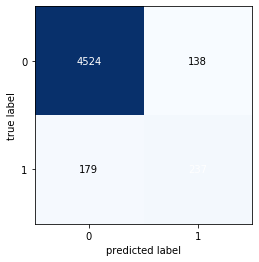

In [29]:
print("Rf")
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()




~ Using LDA ~ 


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Predicting tweet: Sanju Movie was fantastic
Result: ['SI']
Accuracy: 55.061%


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


roc_auc_score : 0.7136313886529005
              precision    recall  f1-score   support

          ST       0.46      0.42      0.44       184
          PT       0.46      0.45      0.46       416
          HT       0.39      0.53      0.45       282
          BN       0.21      0.36      0.27       151
          ED       0.68      0.65      0.67       214
          SP       0.04      0.04      0.04        48
          EN       0.78      0.74      0.76      1352
          SI       0.49      0.66      0.56       384
          RE       0.25      0.18      0.21       361
          GM       0.73      0.65      0.69       394
          WB       0.62      0.50      0.56       636
          NW       0.42      0.44      0.43       656

    accuracy                           0.55      5078
   macro avg       0.46      0.47      0.46      5078
weighted avg       0.56      0.55      0.55      5078



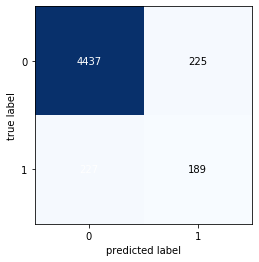

In [30]:
#LDA
print()
print ("~ Using LDA ~ ")
LDAModel = LinearDiscriminantAnalysis()
accuracyLDA = train_model(LDAModel,xtrain_count.toarray(), train_y, xtest_count.toarray(), test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyLDA)))
LDAModel = LDAModel.fit(xtrain_count.toarray(), train_y) 
pred = LDAModel.predict(xtest_count)
import sklearn
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
print(classification_report(test_y, pred,target_names=my_tags))
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()




~ Using NN ~ 
Predicting tweet: Sanju Movie was fantastic
Result: ['PT']
Accuracy: 69.673%
roc_auc_score : 0.7816527352610282
              precision    recall  f1-score   support

          ST       0.61      0.50      0.55       184
          PT       0.54      0.57      0.56       416
          HT       0.65      0.65      0.65       282
          BN       0.53      0.41      0.46       151
          ED       0.85      0.80      0.82       214
          SP       0.00      0.00      0.00        48
          EN       0.81      0.88      0.84      1352
          SI       0.75      0.81      0.78       384
          RE       0.41      0.35      0.38       361
          GM       0.89      0.85      0.86       394
          WB       0.73      0.74      0.73       636
          NW       0.56      0.55      0.55       656

    accuracy                           0.70      5078
   macro avg       0.61      0.59      0.60      5078
weighted avg       0.69      0.70      0.69      5078



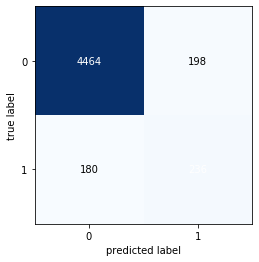

In [31]:
#NN
print()
print ("~ Using NN ~ ")
NNModel = MLPClassifier(activation='relu', max_iter=800, solver='lbfgs', learning_rate_init=0.005, hidden_layer_sizes=(46, 44), random_state=1)
accuracyNN = train_model(NNModel, xtrain_count.toarray(), train_y, xtest_count.toarray(), test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyNN)))
NNModel = NNModel.fit(xtrain_count, train_y) 
pred = NNModel.predict(xtest_count)
import sklearn
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
print(classification_report(test_y, pred,target_names=my_tags))
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()


In [0]:
def majority_voting(x_train, y_train, x_test, y_test):    
    NBPredict = NBModel.predict(x_test)
    SVCPredict = SVCModel.predict(x_test)
    LRPredict = LRModel.predict(x_test)
    RFPredict = RFModel.predict(x_test)
    NNPredict = NNModel.predict(x_test)
#    
    votingPred = []
    
    for i in range(len(y_test)):
        for_pred = [NBPredict[i], LRPredict[i], SVCPredict[i], RFPredict[i], NNPredict[i]]
        highest = for_pred[0]
        count = 0
        for current_pred in for_pred: 
            new_count = 0
            for test_pred in for_pred:
                if current_pred == test_pred:
                    new_count = new_count + 1
            if new_count > count:
                highest = current_pred
                count = new_count
        votingPred.append(highest)
           
    return metrics.accuracy_score(votingPred, y_test)

In [0]:
def majorityVotingPredictor(inputX):
    NBPredict = NBModel.predict(count_vect.transform([inputX]))
    SVCPredict = SVCModel.predict(count_vect.transform([inputX]))
    LRPredict = LRModel.predict(count_vect.transform([inputX]))
    RFPredict = RFModel.predict(count_vect.transform([inputX]))
    NNPredict = NNModel.predict(count_vect.transform([inputX]))
    
    print("NB: {}".format(encoder.inverse_transform(NBPredict)))
    print("SVC: {}".format(encoder.inverse_transform(SVCPredict)))
    print("LR: {}".format(encoder.inverse_transform(LRPredict)))
    print("RF: {}".format(encoder.inverse_transform(RFPredict)))
    print("NN: {}".format(encoder.inverse_transform(NNPredict)))
    
    for_pred = [NBPredict, LRPredict, SVCPredict, RFPredict, NNPredict]
    highest = for_pred[0]
    count = 0
    for current_pred in for_pred: 
        new_count = 0
        for test_pred in for_pred:
            if current_pred == test_pred:
                new_count = new_count + 1
        if new_count > count:
            highest = current_pred
            count = new_count
    
    return encoder.inverse_transform(highest)

In [34]:
print()
print ("~ Using Majority Voting ~ ")
votingAccuracy = majority_voting(xtrain_count, train_y, xtest_count, test_y)
print ("Accuracy: {}%".format(formatAccuracy(votingAccuracy)))


~ Using Majority Voting ~ 
Accuracy: 72.883%


In [35]:
custom_input = "The mummy is my favourite movie the songs was amazing"
print("Predicting tweet: {}".format(custom_input))
result = majorityVotingPredictor(preprocess(custom_input))
print("Majority Voting: {}".format(result))

Predicting tweet: The mummy is my favourite movie the songs was amazing
NB: ['EN']
SVC: ['EN']
LR: ['EN']
RF: ['EN']
NN: ['EN']
Majority Voting: ['EN']
